In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_advan = pd.read_json('./data_advan_workplus_with_stock.json', orient='records')
df_axioo = pd.read_json('./data_axioo_pongo_with_stock.json', orient='records')

In [3]:
df_advan.drop(['Link'], axis=1, inplace=True)
df_advan.head()

,Nama,Rating,Harga,Terjual,Lokasi,Stok,rate_5,rate_4,rate_3,rate_2,rate_1
0,ADVAN Laptop Workplus AMD RYZEN 5 6600H 14'' F...,4.9,7099000,3000,Kab. Tangerang,313,1616,71,21,3,23
1,ADVAN Laptop Workplus AMD RYZEN 5 6600H 14'' F...,4.9,6725000,2000,Kab. Tangerang,15,1147,46,10,6,4
2,"Laptop ADVAN Workplus AMD RYZEN 5 6600H 14"" FH...",5.0,7039000,21,Tangerang,36,10,0,0,0,0
3,ADVAN Laptop Workplus AMD RYZEN 5 6600H 14'' F...,4.9,7099000,250,Kab. Tangerang,357,139,1,3,0,2
4,ADVAN Laptop Workplus AMD RYZEN 5 6600H 16GB 5...,5.0,7043000,100,Jakarta Pusat,10,86,0,0,0,0


In [4]:
df_axioo.drop(['Link'], axis=1, inplace=True)
df_axioo.head()

,Nama,Rating,Harga,Terjual,Lokasi,Stok,rate_5,rate_4,rate_3,rate_2,rate_1
0,LAPTOP AXIOO PONGO 725 | i7 12650H 16GB 512GB ...,5.0,10899000,100,Jakarta Utara,6,95,5,0,0,0
1,LAPTOP AXIOO PONGO 725 I7-12560H 16GB SSD 512G...,5.0,10689000,13,Jakarta Pusat,2,9,0,0,0,0
2,AXIOO pongo 725 RTX2050 I7 12650H 16GB 512GB ...,5.0,10899000,80,Jakarta Utara,999,57,0,0,0,0
3,Axioo Pongo 725 Core i7-12650H 16GB 512GB RTX2...,5.0,10894000,60,Jakarta Pusat,21,28,0,0,0,0
4,AXIOO Pongo 725 GeForce RTX™ 2050 - i7 12650H ...,5.0,10888999,30,Jakarta Utara,5,27,0,0,0,0


In [5]:
df_axioo = df_axioo[df_axioo['Nama'].str.contains('(?i)(Axioo|AXIOO|axioo).*725')]

C:\Users\amr16\AppData\Local\Temp\ipykernel_5416\3202679421.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_axioo = df_axioo[df_axioo['Nama'].str.contains('(?i)(Axioo|AXIOO|axioo).*725')]


In [6]:
df_advan = df_advan[df_advan['Nama'].str.contains('advan', flags=re.IGNORECASE, regex=True) &
                    df_advan['Nama'].str.contains('workplus', flags=re.IGNORECASE, regex=True)]

In [7]:
df_axioo['average_rate'] = (
    (df_axioo['rate_5'] * 5 + df_axioo['rate_4'] * 4 + df_axioo['rate_3'] * 3 + df_axioo['rate_2'] * 2 + df_axioo['rate_1'] * 1) /
    (df_axioo['rate_5'] + df_axioo['rate_4'] + df_axioo['rate_3'] + df_axioo['rate_2'] + df_axioo['rate_1']))

df_advan['average_rate'] = (
    (df_advan['rate_5'] * 5 + df_advan['rate_4'] * 4 + df_advan['rate_3'] * 3 + df_advan['rate_2'] * 2 + df_advan['rate_1'] * 1) /
    (df_advan['rate_5'] + df_advan['rate_4'] + df_advan['rate_3'] + df_advan['rate_2'] + df_advan['rate_1']))

In [8]:
df_advan['Lokasi_Label'] = df_advan['Lokasi'].astype('category').cat.codes
df_axioo['Lokasi_Label'] = df_axioo['Lokasi'].astype('category').cat.codes

In [50]:
df_axioo.drop(['Rating', 'rate_5', 'rate_4', 'rate_3', 'rate_2', 'rate_1'], axis=1, inplace=True)
df_advan.drop(['Rating', 'rate_5', 'rate_4', 'rate_3', 'rate_2', 'rate_1'], axis=1, inplace=True)

In [55]:
df_axioo.head(20)

,Nama,Rating,Harga,Terjual,Lokasi,Stok,Lokasi_Label,average_rate
0,LAPTOP AXIOO PONGO 725 | i7 12650H 16GB 512GB ...,5.0,10899000,100,Jakarta Utara,6,13,4.950000
1,LAPTOP AXIOO PONGO 725 I7-12560H 16GB SSD 512G...,5.0,10689000,13,Jakarta Pusat,2,10,5.000000
2,AXIOO pongo 725 RTX2050 I7 12650H 16GB 512GB ...,5.0,10899000,80,Jakarta Utara,999,13,5.000000
3,Axioo Pongo 725 Core i7-12650H 16GB 512GB RTX2...,5.0,10894000,60,Jakarta Pusat,21,10,5.000000
4,AXIOO Pongo 725 GeForce RTX™ 2050 - i7 12650H ...,5.0,10888999,30,Jakarta Utara,5,13,5.000000
5,Axioo Pongo 725 Core i7-12650H 16GB 512GB RTX2...,4.8,10898999,30,Jakarta Pusat,5,10,4.823529
6,LAPTOP AXIOO PONGO 725 i7 12650H 512GB RTX2050...,5.0,10789000,30,Jakarta Pusat,488,10,5.000000
7,Axioo Pongo 725 Core i7-12650H RTX 2050 16GB 5...,5.0,10898979,40,Jakarta Pusat,11,10,5.000000
8,AXIOO PONGO 725 I7 12650H RTX2050 16GB 512GB S...,4.9,10899000,17,Jakarta Utara,998,13,4.909091
9,AXIOO Pongo 725 RTX2050 4GB / i7 12650h16GB 51...,5.0,10899000,21,Surabaya,5,46,5.000000


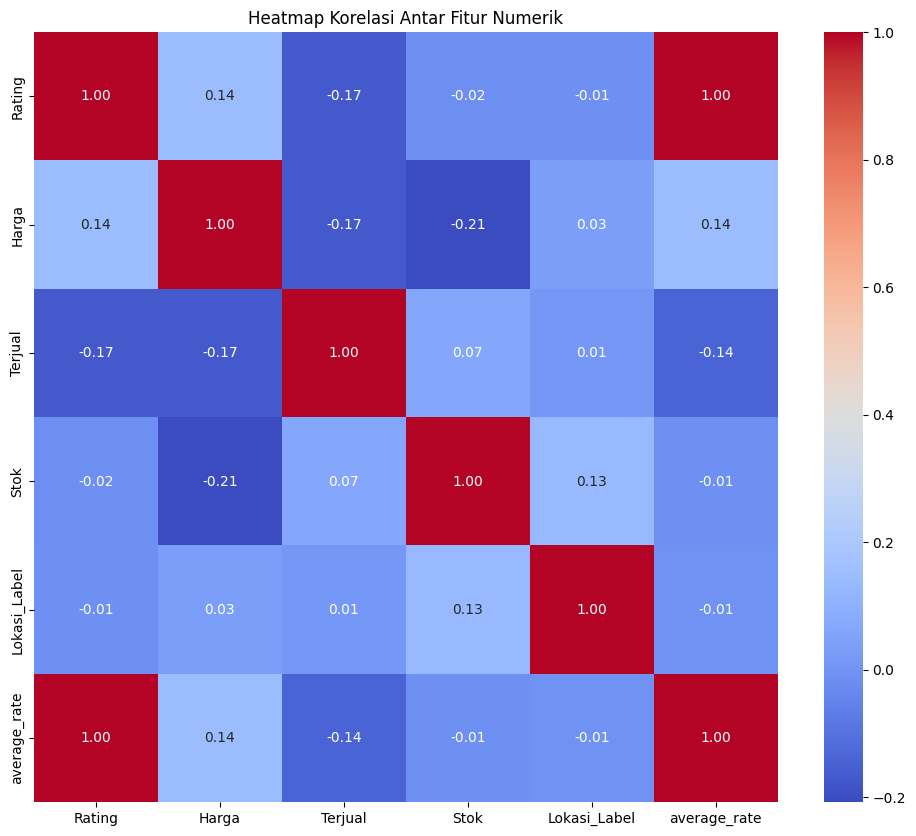

In [63]:
# Membuat subset dari data yang hanya berisi kolom numerik
data_numerik = df_axioo.select_dtypes(include=['int8', 'int64', 'float64'])

# Menghitung korelasi antar kolom numerik
korelasi = data_numerik.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

In [61]:
df_axioo['Lokasi'].dtype

dtype('O')

In [65]:
df_axioo.describe()

,Rating,Harga,Terjual,Stok,Lokasi_Label,average_rate
count,175.000000,1.134000e+03,1134.000000,1134.000000,1134.000000,175.000000
mean,4.936571,1.231718e+07,27.852734,1287.441799,18.728395,4.934858
std,0.240521,6.493266e+06,303.028603,10259.879752,14.657982,0.239637
min,2.000000,1.400000e+04,0.000000,0.000000,0.000000,2.000000
25%,4.900000,1.069912e+07,0.000000,8.000000,10.000000,4.930288
50%,5.000000,1.484280e+07,0.000000,24.000000,11.000000,5.000000
75%,5.000000,1.641219e+07,0.000000,100.000000,33.000000,5.000000
max,5.000000,3.582000e+07,5000.000000,99923.000000,51.000000,5.000000
